# Tarea 1
### José Emanuel Rodríguez Fitta

Objetivo: Hacer un modelo de regresión que prediga cuánto se le debe cobrar a un paciente por una aseguradora dado su historial clínico básico e información demógrafica.

1. Descargar el dataset 'insurance.csv'.
2. Responder las preguntas listadas abajo en un notebook de Python. Cada pregunta tiene una puntuación, en total suman 10.
3. Exportar el notebook en formato PDF y subirlo a Moodle. Solo se aceptarán entregas en PDF.

In [1]:
# Carga de librerias y dependencias para manipulación de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Carga de datos
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1. ¿Existen valores nulos en alguna columna?


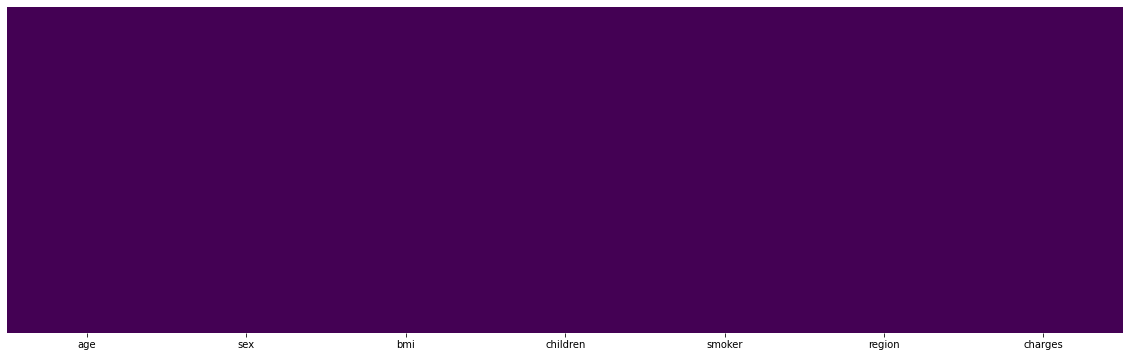

In [27]:
plt.figure(figsize=(20, 6))
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

No existen valores nulos en ninguna columna

### 2. Graficar la distribución de la columna "charges"

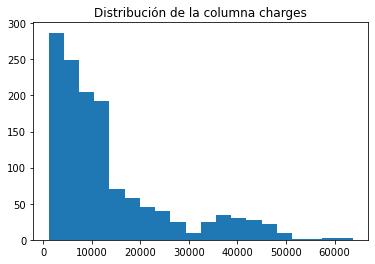

In [35]:
plt.hist(insurance_df['charges'], bins = 20)
plt.title('Distribución de la columna charges')
plt.show()

### 3. Graficar la distribución conjunta de "charges" y "age" para los no fumadores

In [5]:
# filtrado de datos para no fumadores
no_smokers = insurance_df[ insurance_df['smoker'] == 'no']
no_smokers.head(5)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


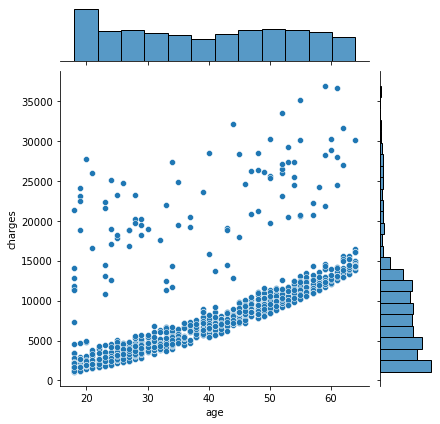

In [36]:
sns.jointplot(x = 'age', y = 'charges', data = no_smokers)
plt.show()

### 4. Graficar la matriz de correlación entre las variables incluyendo la variable "charges"

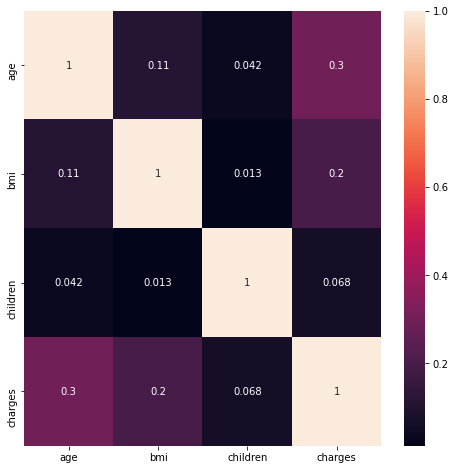

In [7]:
f, axis = plt.subplots( figsize = ( 8, 8))
sns.heatmap( insurance_df.corr(), annot= True)
plt.show()

La variable "children" es la variable que menos afecta a la variable "charges". Así mismo, podemos observar que no existe redundancia en los datos, es decir, no existen variables con un relación alta entre ellas.

### 5. Ajustar los siguientes modelos y encontrar las métricas $R^2$ para cada uno de ellos (se debe predecir la variable "charges")

In [8]:
# Creamos un dataframe transformando las variables categoricas
insurance_df_dummies = pd.get_dummies(insurance_df)

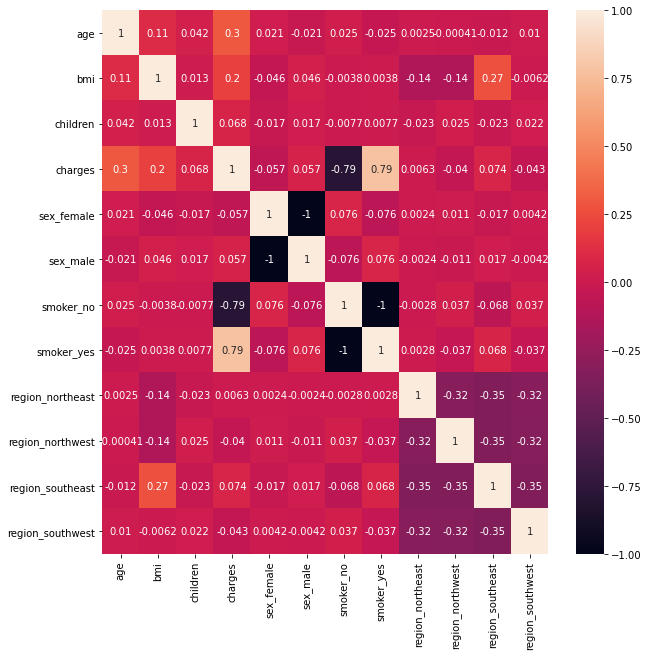

In [9]:
f, axis = plt.subplots( figsize = ( 10, 10))
sns.heatmap( insurance_df_dummies.corr(), annot= True)
plt.show()

En este caso podemos observar que existen variables redundantes entre sí, por ejemplo las variables "sex_female" y "sex_male" tiene una correlación de 1, de igual forma las variables "smoker_yes" y "smoker_no". Por lo que se buscará eliminar la redundancia. 

Por otro lado podemos ver, que la variable "smoker_yes" tiene un alto efecto en la variable "charges".

In [10]:
# Carga de librerias y dependencias para machine learning
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# Después de obtener variables dummies, se tienen las siguientes columnas
insurance_df_dummies.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [48]:
# Selección de variables independientes para eliminar redundancia
features_dummies = ['age', 
                    'bmi',
                    'smoker_yes',
                    'region_northeast',
                    'region_southeast'
                   ]
print(features_dummies)

['age', 'bmi', 'smoker_yes', 'region_northeast', 'region_southeast']


In [13]:
# features originales (seleccionadas para hacer una comparación)
features_originales = ['age', 'bmi', 'children']

In [62]:
# Función para aplicar standarizacion o normalizacion y dividir el conjunto
def tipo_transformacion(features, tipo_transformador):
    
    '''
    Esta función servirá para iterar sobre la estandarización y la normalización, para comparar cual tiene un mejor 
    resultado en el score. Esta función regresa una tupla con los cuatro conjuntos de entranmiento ya considerando
    la transformación.
    '''
    
    X = insurance_df_dummies[ features ] # Creación de variable dependiente
    y = insurance_df_dummies['charges'] # Creación de variable target
    
    
    if tipo_transformador == 'NA': # Si no se aplica una transformación a los datos
        X_trans = X.values
    else:  # Procedimiento para transformar datos
        X_trans = tipo_transformador.fit_transform(X)
        
    # División de datos con un test size del 30%
    X_train, X_test, y_train, y_test = train_test_split(X_trans, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
    return ( X_train, X_test, y_train, y_test )

In [77]:
# Funcion para imprimir el score sobre el conjunto de entrenamiento y testing
def imprimir_resultados(modelo, tupla_train_test, transformador):
    print('***************************')
    print(transformador)
    print('Score en el conjunto de entrenamiento: {}'.format(modelo.score(tupla_train_test[0], tupla_train_test[2])))
    print('Score en el conjunto de prueba: {}'.format(modelo.score(tupla_train_test[1], tupla_train_test[3])))

In [51]:
# Diccionario con los transformadores de datos que probaremos
dict_tipos = {'standard scaler': StandardScaler(), 'min max scaler': MinMaxScaler(), 'sin escalamiento': 'NA'}

### a. Linear Regression

##### Features originales

In [78]:
# Iteración sobre los transformadores de datos con los features originales
for tipo in dict_tipos.keys():
    (X_train, X_test, y_train, y_test) = tipo_transformacion(features_originales, dict_tipos[tipo])
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print('\n')
    imprimir_resultados(lr, (X_train, X_test, y_train, y_test), tipo )



***************************
standard scaler
Score en el conjunto de entrenamiento: 0.10360358728367625
Score en el conjunto de prueba: 0.14974128064925762


***************************
min max scaler
Score en el conjunto de entrenamiento: 0.10360358728367625
Score en el conjunto de prueba: 0.1497412806492575


***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.10360358728367625
Score en el conjunto de prueba: 0.14974128064925762


Observamos que este modelo se ajusta muy mal a los datos tanto de entrenamiento como de prueba, por lo cual no es un buen modelo.

##### Features considerando variables dummies

In [79]:
# Iteración sobre los transformadores de datos con la selección de features
for tipo in dict_tipos.keys():
    (X_train, X_test, y_train, y_test) = tipo_transformacion(features_dummies, dict_tipos[tipo])    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print('\n')
    imprimir_resultados(lr, (X_train, X_test, y_train, y_test), tipo )



***************************
standard scaler
Score en el conjunto de entrenamiento: 0.7286480474488445
Score en el conjunto de prueba: 0.7882298585341784


***************************
min max scaler
Score en el conjunto de entrenamiento: 0.7286480474488445
Score en el conjunto de prueba: 0.7882298585341784


***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.7286480474488445
Score en el conjunto de prueba: 0.7882298585341785


A pesar de que el score mejoró mucho en ambos conjuntos de entrenamiento, podemos notar que existe un desajuste (underfitting) en el modelo con cualquiera de los tres transformadores.

### b. Ridge Regression

In [19]:
alpha_range = 10. ** np.arange(-5, 5)
alpha_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

##### Features originales

In [80]:
(X_train, X_test, y_train, y_test) = tipo_transformacion(features_originales, 'NA')

ridge = RidgeCV(alphas = alpha_range, normalize = True, scoring = 'r2')
ridge.fit(X_train, y_train)
print('alpha = {}'.format(ridge.alpha_))
imprimir_resultados(ridge, (X_train, X_test, y_train, y_test), 'sin escalamiento' )

alpha = 0.01
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.10359544899509288
Score en el conjunto de prueba: 0.1491702001028996


Este modelo tiene score demasiado bajo en ambos conjuntos, por lo cual no se considerará

##### Features considerando variables dummies

In [21]:
(X_train, X_test, y_train, y_test) = tipo_transformacion( features_dummies, 'NA')

ridge = RidgeCV(alphas = alpha_range, normalize = True, scoring = 'r2')
ridge.fit(X_train, y_train)
print('alpha = {}'.format(ridge.alpha_))
imprimir_resultados(ridge, (X_train, X_test, y_train, y_test), 'sin escalamiento' )

alpha = 0.001
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.7286472494548017
Score en el conjunto de prueba: 0.7881659032587025


De nueva cuenta, tenemos un modelo con desajuste

### c. Lasso Regression

##### Features originales

In [22]:
(X_train, X_test, y_train, y_test) = tipo_transformacion(features_originales, 'NA')

lasso = LassoCV(n_alphas = 100, normalize = True, random_state = 1)
lasso.fit(X_train, y_train)
print('alpha = {}'.format(lasso.alpha_))
imprimir_resultados(lasso, (X_train, X_test, y_train, y_test), 'sin escalamiento' )

alpha = 0.10843542646109017
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.10360337964120792
Score en el conjunto de prueba: 0.1496683499317969


##### Features considerando variables dummies

In [23]:
(X_train, X_test, y_train, y_test) = tipo_transformacion(features_dummies, 'NA')

lasso = LassoCV(n_alphas = 100, normalize = True, random_state = 1)
lasso.fit(X_train, y_train)
print('alpha = {}'.format(lasso.alpha_))
imprimir_resultados(lasso, (X_train, X_test, y_train, y_test), 'sin escalamiento' )

alpha = 0.9130327866341917
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.7286179568782928
Score en el conjunto de prueba: 0.7879863144063997


En ambos casos pasa algo muy similar a lo que sucede con el modelo Ridge Regression, por lo cual tampoco es un buen modelo a considerar.

### d. KNN regression

##### Features originales

In [42]:
# Iteramos sobre el número de vecinos y después iteramos sobre cada transformador de datos considerado
for i in [3, 7, 9]:
    for tipo in dict_tipos.keys():
        (X_train, X_test, y_train, y_test) = tipo_transformacion( features_originales, dict_tipos[tipo])
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train, y_train)
        print('\nNumero de vecinos: {}'.format(i))
        imprimir_resultados(knn, (X_train, X_test, y_train, y_test), tipo )


Numero de vecinos: 3
***************************
standard scaler
Score en el conjunto de entrenamiento: 0.3849664270466423
Score en el conjunto de prueba: -0.13170246300153798

Numero de vecinos: 3
***************************
min max scaler
Score en el conjunto de entrenamiento: 0.38316892463301355
Score en el conjunto de prueba: -0.1631224507959057

Numero de vecinos: 3
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.413052125287396
Score en el conjunto de prueba: 0.01482845127035004

Numero de vecinos: 7
***************************
standard scaler
Score en el conjunto de entrenamiento: 0.2037242190070585
Score en el conjunto de prueba: 0.0487036863915532

Numero de vecinos: 7
***************************
min max scaler
Score en el conjunto de entrenamiento: 0.2135199784730607
Score en el conjunto de prueba: 0.045371667439577545

Numero de vecinos: 7
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.201820009693

En cualquier caso podemos ver que el considerar unicamente las variiables originales, nos arroja un score muy bajo en ambos conjuntos. Por lo cual, en este caso, las variables originales, definitivamente no son la opción a considerar en el modelo.

##### Features considerando variables dummies


In [82]:
for i in [3, 7, 9]:
    for tipo in dict_tipos.keys():
        (X_train, X_test, y_train, y_test) = tipo_transformacion(features_dummies, dict_tipos[tipo])

        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train, y_train)
        print('\nNumero de vecinos: {}'.format(i))
        imprimir_resultados(knn, (X_train, X_test, y_train, y_test), tipo )


Numero de vecinos: 3
***************************
standard scaler
Score en el conjunto de entrenamiento: 0.890809999634413
Score en el conjunto de prueba: 0.8221696553794654

Numero de vecinos: 3
***************************
min max scaler
Score en el conjunto de entrenamiento: 0.8915283137179597
Score en el conjunto de prueba: 0.8161129587950151

Numero de vecinos: 3
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.5837383552891022
Score en el conjunto de prueba: 0.21199733781584185

Numero de vecinos: 7
***************************
standard scaler
Score en el conjunto de entrenamiento: 0.863261586060531
Score en el conjunto de prueba: 0.8603641238942498

Numero de vecinos: 7
***************************
min max scaler
Score en el conjunto de entrenamiento: 0.8545730205201258
Score en el conjunto de prueba: 0.8540317210674518

Numero de vecinos: 7
***************************
sin escalamiento
Score en el conjunto de entrenamiento: 0.3432685427245663
Sc

En este caso, tenemos mejores predicciones sobre los conjuntos de entrenamiento y prueba cuando consideramos StandardScaler.

### 6. ¿Cuáles son las mejores variables para la predicción de "charges"?

Debido a la alta relación que guarda la variable "smoker_yes" con "charges", esta es la variable que más afecta la predicción de la variable target. Sin embargo también tienen un efecto considerable las variables:

In [83]:
features_dummies

['age', 'bmi', 'smoker_yes', 'region_northeast', 'region_southeast']

### 7. Discuta cuál modelo entrega mejor predictiibilidad y por qué

Podemos observar que el modelo KNeighborsRegressor con un número de 7 vecinos, y habiendo transformando las variables de la pregunta anterior mediante StandardScaler, arroja la mejor predictibilidad. Esto debido a que tenemos un score sobre el conjunto de entrenamiento de 0.863 mientras que sobre el conjunto de prueba tenemos 0.86. El resto de los modelos presenta un desajuste notorio o una diferencia mayor a 0.003 entre los scores de ambos conjuntos, por lo cual este es el mejor modelo. 

In [84]:
from sklearn.metrics import r2_score

In [86]:
(X_train, X_test, y_train, y_test) = tipo_transformacion(features_dummies, dict_tipos['standard scaler'])
knn = knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)
r2_score(y_test, knn.predict(X_test))

0.8603641238942498

### 8. Haga un resumen ejecutivo de los resultados del modelo para presentar a una audiencia de negocio

El objetivo de la creación del modelo predictor, es poder calcular, con la mayor certeza la prima de seguro que se debe cobrar al cliente de acuerdo a su información demográfica. El problema de no tener una alta precisión radica en que al cliente podría cobrársele más o menos de lo que se debe, afectando la relación con ellos o impactando la economía de la empresa. Para ello se ha hecho uso de herramientas de machine learning, y tomando como base los datos que ya se conocen, es decir las primas cobradas a los clientes y los datos de los mismos se creó un modelo que puede predecir con una precisión del 86% la prima de seguro adecuada a cada cliente. Es decir, a 8 de cada diez clientes se les cobrará una prima que vaya de acuerdo a su forma de vida, ya que se consideró su edad, su BMI, su ubicación y si son fumadores o no. Siendo está última variable la que más impacto tiene en nuestras predicciones. Por lo tanto es importante asegurar este dato de cada cliente para disminuir el margen de error. Así mismo pensamos que sería interesante recabar más información respecto a esto, pues esto podría aumentar la precisión del modelo. Consideramos que, relacionado con esto, las variables que pueden tener un impacto positivo en las predicciones, son el número de cigarros fumados al día o la cantidad de ejercicio realizada.